In [1]:
#Delete duplicates of imports, slows down code

from __future__ import print_function
import sys, os
sys.path.insert(0, '..')

#from tensorflow.python.keras.layers import Input, Dense
import math
from sklearn.metrics import roc_curve, auc,f1_score

#import tensorflow as tf

import pickle
import os
import scipy.io
from scipy import stats
from sklearn.model_selection import cross_val_score

import time
from sklearn.model_selection import train_test_split

from sklearn.model_selection import LeaveOneOut

import pandas as pd

from sklearn.decomposition import PCA
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd

from sklearn.model_selection import GridSearchCV, cross_val_score,cross_val_predict,StratifiedKFold,KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score,confusion_matrix, mean_squared_error,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [6]:
rootdir = 'C:/Users/Zman/Desktop/Jiook/Zachs_Repo'

In [7]:
holder=[]
for subdir, dirs, files in os.walk(rootdir):
    if subdir.find('nilearn_cache') == -1:
        holder.append(subdir)
    

In [9]:
real_list=holder[1:] # list should be list of patients

print(real_list)

In [612]:
def remove_cruft(s):
    return s[79:92]

true_list=[remove_cruft(s) for s in real_list]

In [613]:
def remove_cruft(s):
    return s[79:85]
list_formatfiles=[remove_cruft(s) for s in real_list]

In [614]:
with open('fmri_list.csv', "w", newline='') as output:
    writer=csv.writer(output)
    for val in true_list:
        writer.writerow([val])

In [615]:
i=0
os.chdir('C:/Users/juke/Documents/family_depression/src_zach/embarc_fmri_deliverable/sub-CU0009CUMR1R1')
matfilename='sub-'+true_list[i]+'_resultsROI.mat'

test=scipy.io.loadmat(matfilename)
data = np.array(test['Z'])


In [616]:
# real_list is list of directories to go into
i=0

true_data=np.zeros((264,264,269))

for d in real_list:
    os.chdir(d)
    matfilename='sub-'+true_list[i]+'_resultsROI.mat'


In [617]:
os.chdir('C:/Users/juke/Documents/family_depression/src_zach/embarc_fmri_deliverable')
scipy.io.savemat('fmri_connectivity_data.mat',mdict={'result':true_data})

In [618]:
print(true_data.shape)

(264, 264, 269)


## test loading data in

In [619]:
os.chdir('C:/Users/juke/Documents/family_depression/src_zach/embarc_fmri_deliverable')

In [620]:
X_load=scipy.io.loadmat('fmri_connectivity_data.mat') # file storing data of all patients not just 86, and connectivity data
X_connectivity=np.array(X_load['result'])

In [5]:
def get_pats():
    
    alldata=pd.read_csv('SER_MOR_136_v4.csv',header=0)
    #print(alldata.shape)
    alldata=np.array(alldata)
    datasubjid=alldata[:,0]

    list_subjs=pd.read_csv('fmri_list.csv')
    list_subjs=list_subjs.apply(lambda x: x.str.slice(0,10))


    holder = []
    for i in list_subjs:
        holder.append(list_subjs[i])

    trick = isinstance(holder, list)

    # you want the correlation matrices of: one type for only the test_group not control
    # therefore, you need to get the indices of these patients to access their numbers
    filtindex=np.isin(list_subjs,datasubjid)
    filtindex=filtindex.ravel()


    X=X_connectivity[:,:,filtindex]
    #print(X.shape)



    reverseindex=np.isin(datasubjid,list_subjs)
    reverseindex=reverseindex.ravel()
    #print(reverseindex.shape)

    list_of_x = datasubjid[reverseindex]
    y=alldata[:,1]
    y=np.array(y,dtype=np.float64)
    y=y[reverseindex]

    labelofy=alldata[:,0]
    labelofy=labelofy[reverseindex]
    #print(y.shape)

    removeblank=isnan(y)
    final = labelofy[~removeblank]

    y_connectome=y[~removeblank]


    X=X[:,:,~removeblank]
    #print(X.shape)
    return X[:]

In [6]:
get_pats()

NameError: name 'pd' is not defined

In [677]:
check = np.isin(list_formatfiles, final)

true_list = np.asarray(true_list)


new_list = true_list[check]


In [678]:
mod_list = []
for i in range(len(new_list)):
    TEMP = new_list[i]
    TEMP = TEMP[0:6]
    mod_list.append(TEMP)


In [679]:
lock=np.isin(alldata[:,0], mod_list)

index = []
for i in range(len(alldata)):
    if (lock[i]):
        index.append(i)

index = np.asarray(index)


In [680]:
mod_data = []
for i in range(0,86):
    c = index[i]
    mod_data.append(alldata[c,:])

mod_data = np.asarray(mod_data)


In [681]:
label = []
for i in range(len(mod_data)):
    label.append(mod_data[i,1])

In [368]:
import nibabel as nib

#shrink size of alldata to 86


all_data=np.zeros((86,91,109,91,180,2))

i=0
for i in range(0,86):
    os.chdir('C:/Users/juke/Documents/family_depression/src_zach/embarc_fmri_deliverable/sub-' + new_list[i])
    timeseries1='swausub-'+new_list[i]+'_ses-1_task-rest_run-1_bold.nii.gz'
    timeseries2='swausub-'+new_list[i]+'_ses-1_task-rest_run-2_bold.nii.gz'
    
    img1=nib.load(timeseries1)
    img2=nib.load(timeseries2)

    all_data[i,:,:,:,:,0]=img1.get_data()
    all_data[i,:,:,:,:,1]=img2.get_data()
    
    i+=1


    
    

CU0016CUMR1R1
CU0021CUMR1R1
CU0022CUMR1R1
CU0024CUMR1R1
CU0025CUMR1R1
CU0027CUMR1R1
CU0033CUMR1R1
CU0034CUMR1R1
CU0036CUMR1R1
CU0046CUMR1R1
CU0051CUMR1R1
CU0056CUMR1R1
CU0057CUMR1R1
MG0021MGMR1R1
MG0069MGMR1R1
MG0076MGMR1R1
MG0101MGMR1R1
MG0116MGMR1R1
MG0126MGMR1R1
MG0135MGMR1R1
MG0152MGMR1R1
MG0172MGMR1R1
MG0182MGMR1R1
MG0209MGMR1R1
MG0218MGMR1R1
MG0222MGMR1R1
MG0238MGMR1R1
MG0243MGMR1R1
MG0246MGMR1R1
MG0257MGMR1R1
MG0270MGMR1R1
TX0014TXMR1R1
TX0020TXMR1R1
TX0039TXMR1R1
TX0043TXMR1R1
TX0050TXMR1R1
TX0060TXMR1R1
TX0067TXMR1R1
TX0068TXMR1R1
TX0070TXMR1R1
TX0078TXMR1R1
TX0079TXMR1R1
TX0083TXMR1R1
TX0086TXMR1R1
TX0090TXMR1R1
TX0092TXMR1R1
TX0093TXMR1R1
TX0095TXMR1R1
TX0100TXMR1R1
TX0101TXMR1R1
TX0110TXMR1R1
TX0112TXMR1R1
TX0115TXMR1R1
TX0127TXMR1R1
TX0130TXMR1R1
TX0133TXMR1R1
TX0136TXMR1R1
TX0142TXMR1R1
TX0169TXMR1R1
TX0172TXMR1R1
TX0173TXMR1R1
TX0175TXMR1R1
TX0182TXMR1R1
TX0187TXMR1R1
TX0188TXMR1R1
TX0189TXMR1R1
TX0193TXMR1R1
TX0195TXMR1R1
UM0025UMMR1R1
UM0034UMMR1R1
UM0037UMMR1R1
UM0047

In [369]:
extract = []
for i in range(0,86):
    time1='swausub-'+new_list[i]+'_ses-1_task-rest_run-1_bold.nii.gz'
    time2='swausub-'+new_list[i]+'_ses-1_task-rest_run-2_bold.nii.gz'
    extract.append('sub-' + new_list[i] + '/' + time1)
    extract.append('sub-' + new_list[i] + '/' + time2)




172
['sub-CU0016CUMR1R1/swausub-CU0016CUMR1R1_ses-1_task-rest_run-1_bold.nii.gz', 'sub-CU0016CUMR1R1/swausub-CU0016CUMR1R1_ses-1_task-rest_run-2_bold.nii.gz', 'sub-CU0021CUMR1R1/swausub-CU0021CUMR1R1_ses-1_task-rest_run-1_bold.nii.gz', 'sub-CU0021CUMR1R1/swausub-CU0021CUMR1R1_ses-1_task-rest_run-2_bold.nii.gz', 'sub-CU0022CUMR1R1/swausub-CU0022CUMR1R1_ses-1_task-rest_run-1_bold.nii.gz', 'sub-CU0022CUMR1R1/swausub-CU0022CUMR1R1_ses-1_task-rest_run-2_bold.nii.gz', 'sub-CU0024CUMR1R1/swausub-CU0024CUMR1R1_ses-1_task-rest_run-1_bold.nii.gz', 'sub-CU0024CUMR1R1/swausub-CU0024CUMR1R1_ses-1_task-rest_run-2_bold.nii.gz', 'sub-CU0025CUMR1R1/swausub-CU0025CUMR1R1_ses-1_task-rest_run-1_bold.nii.gz', 'sub-CU0025CUMR1R1/swausub-CU0025CUMR1R1_ses-1_task-rest_run-2_bold.nii.gz', 'sub-CU0027CUMR1R1/swausub-CU0027CUMR1R1_ses-1_task-rest_run-1_bold.nii.gz', 'sub-CU0027CUMR1R1/swausub-CU0027CUMR1R1_ses-1_task-rest_run-2_bold.nii.gz', 'sub-CU0033CUMR1R1/swausub-CU0033CUMR1R1_ses-1_task-rest_run-1_bold.nii

In [683]:
# Matrix plotting from Nilearn: nilearn.plotting.plot_matrix
import numpy as np
import matplotlib.pylab as plt

#ADD COLOR BARS TO BELOW FUNCTION
def plot_matrices(matrices, matrix_kind): 
    n_matrices = len(matrices)
    fig = plt.figure(figsize=(n_matrices * 4, 4))
    for n_subject, matrix in enumerate(matrices):
        plt.subplot(1, n_matrices, n_subject + 1)
        matrix = matrix.copy()  # avoid side effects
        # Set diagonal to zero, for better visualization
        np.fill_diagonal(matrix, 0)
        vmax = np.max(np.abs(matrix))
        title = '{0}, subject {1}'.format(matrix_kind, n_subject)
        plotting.plot_matrix(matrix, vmin=-vmax, vmax=vmax, cmap='RdBu_r',
                             title=title, figure=fig, colorbar=False)

In [684]:
from nilearn import datasets

msdl_data = datasets.fetch_atlas_msdl()
print(len(msdl_data))
msdl_coords = msdl_data.region_coords
n_regions = len(msdl_coords)
print('MSDL has {0} ROIs, part of the following networks :\n{1}.'.format(
    n_regions, msdl_data.networks))

5
MSDL has 39 ROIs, part of the following networks :
[b'Aud', b'Aud', b'Striate', b'DMN', b'DMN', b'DMN', b'DMN', b'Occ post', b'Motor', b'R V Att', b'R V Att', b'R V Att', b'R V Att', b'Basal', b'L V Att', b'L V Att', b'L V Att', b'D Att', b'D Att', b'Vis Sec', b'Vis Sec', b'Vis Sec', b'Salience', b'Salience', b'Salience', b'Temporal', b'Temporal', b'Language', b'Language', b'Language', b'Language', b'Language', b'Cereb', b'Dors PCC', b'Cing-Ins', b'Cing-Ins', b'Cing-Ins', b'Ant IPS', b'Ant IPS'].


C:\Users\juke\Miniconda3\envs\tfpls\lib\site-packages\numpy\lib\npyio.py:2258: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [685]:
from nilearn import input_data
masker = input_data.NiftiMapsMasker(
    msdl_data.maps, resampling_target="data", t_r=2.5, detrend=True,
    low_pass=.1, high_pass=.01, memory='nilearn_cache', memory_level=1)

In [686]:
for i in range(0,86):
    loc1='swausub-'+new_list[i]+'_ses-1_task-rest_run-1_bold.nii.gz'
    loc2='swausub-'+new_list[i]+'_ses-1_task-rest_run-2_bold.nii.gz'

In [375]:
i=0
changed_subjects = [] 
pooled_subjects = []
site_names = alldata[:,9]
changed_labels = []

index = alldata[:,1]

for i in range(0,86):
    os.chdir('C:/Users/juke/Documents/family_depression/src_zach/embarc_fmri_deliverable/sub-' + new_list[i])
    loc1='swausub-'+new_list[i]+'_ses-1_task-rest_run-1_bold.nii.gz'
    loc2='swausub-'+new_list[i]+'_ses-1_task-rest_run-2_bold.nii.gz'
    time_series = masker.fit_transform(loc1)
    time_series = masker.fit_transform(loc2)

    pooled_subjects.append(time_series)
    if (alldata[i,1] == 1):
        changed_subjects.append(time_series)
        changed_labels.append(datasubjid[i])
    
    i+=1
    
print('Data has {0} changed subjects.'.format(len(changed_subjects)))
    
        
    

Data has 40 changed subjects.


In [687]:
print('Data has {0} pooled subjects.'.format(len(pooled_subjects)))
#print('Data has ' + str(len(pooled_subjects)) + ' pooled subjects.')

Data has 86 pooled subjects.


In [480]:
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrices = correlation_measure.fit_transform(pooled_subjects)
print('Correlations of changed subjects are stacked in an array of shape {0}'
      .format(correlation_matrices.shape))


Correlations of changed subjects are stacked in an array of shape (86, 39, 39)


In [481]:
mean_correlation_matrix = correlation_measure.mean_
print('Mean correlation has shape {0}.'.format(mean_correlation_matrix.shape))

Mean correlation has shape (39, 39).


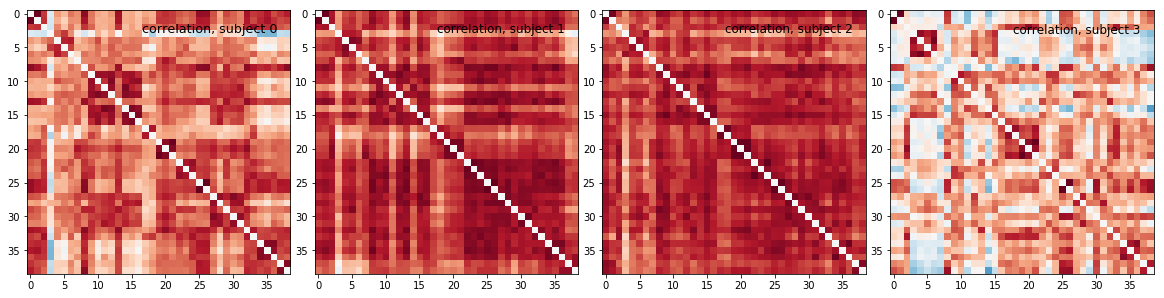

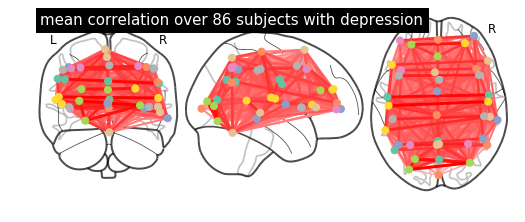

In [483]:
from nilearn import plotting

plot_matrices(correlation_matrices[:4], 'correlation')
plotting.plot_connectome(mean_correlation_matrix, msdl_coords,
                         title='mean correlation over 86 subjects with depression')

In [478]:
partial_correlation_measure = ConnectivityMeasure(kind='partial correlation')
partial_correlation_matrices = partial_correlation_measure.fit_transform(pooled_subjects)

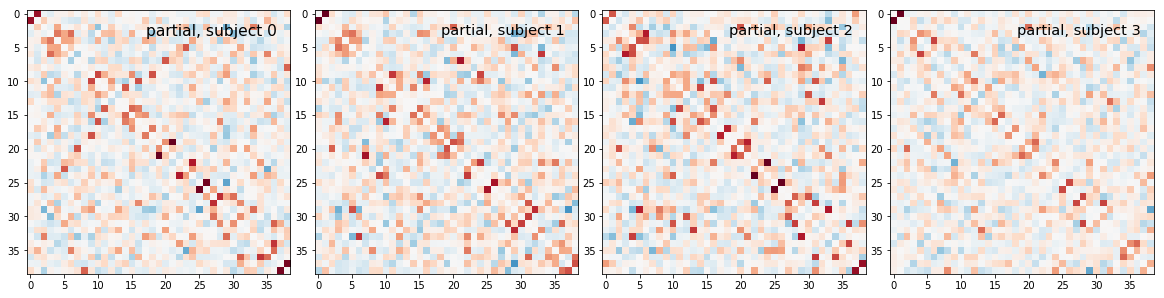

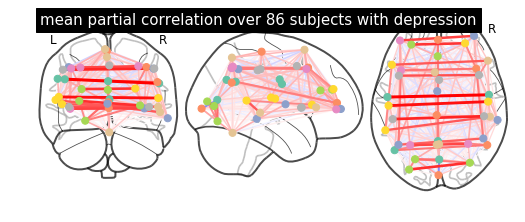

In [479]:
plot_matrices(partial_correlation_matrices[:4], 'partial')
plotting.plot_connectome(
    partial_correlation_measure.mean_, msdl_coords,
    title='mean partial correlation over 86 subjects with depression')

In [449]:
tangent_measure = ConnectivityMeasure(kind='tangent')
tangent_matrices = tangent_measure.fit_transform(pooled_subjects)

In [450]:
print(tangent_matrices.shape)

(86, 39, 39)


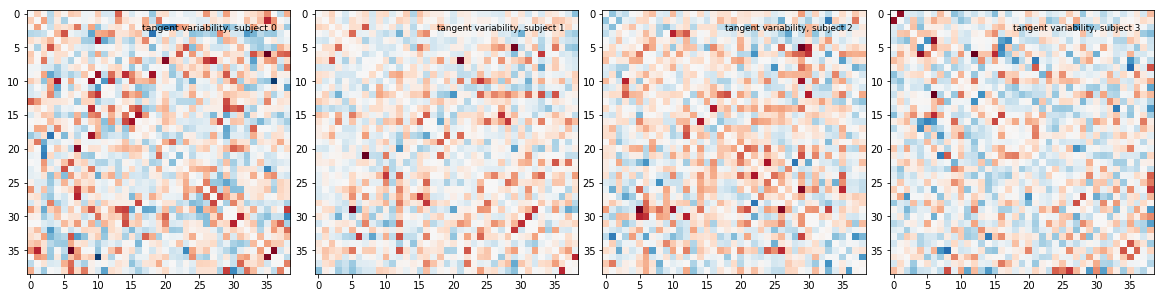

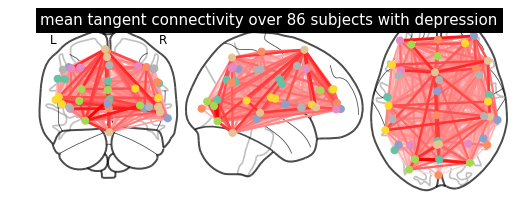

In [451]:
plot_matrices(tangent_matrices[:4], 'tangent variability')
plotting.plot_connectome(
    tangent_measure.mean_, msdl_coords,
    title='mean tangent connectivity over 86 subjects with depression')

In [460]:
#cv = StratifiedKFold(n_splits=3)
#for train_index, test_index in cv.split(tangent_matrices,label):
#    X_train, X_test= tangent_matrices[train_index], tangent_matrices[test_index]
#    y_train, y_test = label[train_index], label[test_index]

In [461]:
#from sklearn.preprocessing import MultiLabelBinarizer


In [476]:
def clf_randomforest(features,y,num_feat,atlas,name,path_to_save, key):

    n_fold = 3
    
    inner_cv = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=234)
    outer_cv = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=234)
    
    

    scaler = RobustScaler() # JC
    scaler.fit(features)
    X = scaler.transform(features)


    avg_acc = []
    avg_hloss = []
    avg_train_acc = []
    avg_pre = []
    avg_rec = []
    avg_f1 = []
    avg_TP = []
    avg_TN = []
    avg_FP = []
    avg_FN = []
    avg_sen = []
    avg_spec = []

    roc_label = []
    roc_pred = []
    roc_prob = []
    
 
   
    for train_index, test_index in outer_cv.split(features,y):
        y = np.asarray(y)
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # 'featureExtract__n_estimators': np.arange(10, 100, 10),
        params = {'randomforest__min_samples_leaf': np.arange(1, 51, 5),
                  'randomforest__n_estimators': np.arange(10, 100, 10)}
        # clf_m = RandomForestClassifier(random_state=0)

        pipe = Pipeline([('PCA',PCA()),
            ('featureExtract', SelectFromModel(ExtraTreesClassifier())),
            ('randomforest', RandomForestClassifier())
        ])
        
        #pipe = Pipeline([
         #   ('featureExtract', SelectFromModel(ExtraTreesClassifier())),
          #  ('randomforest', RandomForestClassifier())
        #])

        clf = GridSearchCV(estimator=pipe, param_grid=params, cv=inner_cv, scoring='accuracy')
        clf.fit(X_train, y_train)

        fs = clf.best_estimator_.named_steps['featureExtract']
        mask = fs.get_support()
        y_pred = clf.predict(X_test)
        y_prob = clf.predict_proba(X_test)
      #  roc_pred = clf.predict_proba(X_test)


        y_pred_train = clf.predict(X_train)
        acc = accuracy_score(y_test, y_pred)
        train_acc = accuracy_score(y_train,y_pred_train)
        auc = roc_auc_score(y_test, y_prob[:, 1])

        roc_label = np.append(roc_label, y_test)
        roc_pred = np.append(roc_pred, y_pred)
        roc_prob = np.append(roc_prob, y_prob[:, 1])


        conf_mat = confusion_matrix(y_test, y_pred)

        TP = conf_mat[0][0]
        FP = conf_mat[0][1]
        FN = conf_mat[1][0]
        TN = conf_mat[1][1]

        avg_TP = np.append(avg_TP, TP)
        avg_TN = np.append(avg_TN, TN)
        avg_FP = np.append(avg_FP, FP)
        avg_FN = np.append(avg_FN, FN)

        avg_acc = np.append(avg_acc, acc)
        avg_train_acc = np.append(avg_train_acc,train_acc)
        print(TP, FP, FN, TN)
        sen = TP / (TP + FN)
        spec = TN / (TN + FP)

        avg_sen = np.append(avg_sen, sen)
        avg_spec = np.append(avg_spec, spec)
        print('Accuracy:{},AUC:{}'.format(acc, auc))
        print('Train Accuracy:{}'.format(train_acc))
        print('ground truth:{}'.format(y_test))
        print('predicted:{}'.format(y_pred))
        print('Sensitivity:{},Specificity:{}'.format(sen, spec))
        

    print("Accuracy Avg: {}".format(np.mean(avg_acc)))
    print("Train Accuracy Avg: {}".format(np.mean(avg_train_acc)))
    print("Accuracy Standard Deviation: {}".format(np.std(avg_acc)))
    print("Sensitivity Avg: {}".format(np.mean(avg_sen)))
    print("Sensitivity Standard Deviation: {}".format(np.std(avg_sen)))
    print("Specificity Avg: {}".format(np.mean(avg_spec)))
    print("Specificity Standard Deviation: {}".format(np.std(avg_spec)))
    
    txt_name=path_to_save+'/'+name +  '.txt'
    fpr = dict()
    tpr = dict()

    all_auc = []

    fpr, tpr, _ = roc_curve(roc_label, roc_prob)
    plt.figure()

    plt.plot(fpr, tpr, lw=2, label=key+ ' '+'(AUC = %0.2f)' % np.mean(all_auc))
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name)
    plt.legend(loc="lower right") 
    plt.savefig('10x_Combined_ROC.eps')
    roc_name=path_to_save+'/'+name +'.pdf'
    plt.savefig(roc_name)
    plt.show()

    #pickle.dump(roc_label, open('roc_label_con_'+str(multi)+'-'+num_feat+'_'+atlas+'.p', "wb"))
    #pickle.dump(roc_pred, open('roc_pred_con_'+str(multi)+'-'+num_feat+'_'+atlas+'.p', "wb"))
    #pickle.dump(roc_prob, open('roc_prob_con_'+str(multi)+'-'+num_feat+'_'+atlas+'.p', "wb"))

In [467]:
tangent_matrices = tangent_matrices.reshape(86,39*39)
print(tangent_matrices.shape)

(86, 1521)


In [604]:
os.chdir('C:/Users/juke/Documents/family_depression/src_zach')

14 2 9 5
Accuracy:0.6333333333333333,AUC:0.6785714285714285
Train Accuracy:0.8571428571428571
ground truth:[1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1]
predicted:[0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0]
Sensitivity:0.6086956521739131,Specificity:0.7142857142857143
4 11 0 13
Accuracy:0.6071428571428571,AUC:0.7589743589743589
Train Accuracy:0.9655172413793104
ground truth:[1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0]
predicted:[1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
Sensitivity:1.0,Specificity:0.5416666666666666
14 1 9 4
Accuracy:0.6428571428571429,AUC:0.7871794871794873
Train Accuracy:1.0
ground truth:[1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1]
predicted:[0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0]
Sensitivity:0.6086956521739131,Specificity:0.8
Accuracy Avg: 0.6277777777777778
Train Accuracy Avg: 0.9408866995073891
Accuracy Standard Deviation: 0.015100236182889278
Sensitivity Avg: 0.7391304347

C:\Users\juke\Miniconda3\envs\tfpls\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\juke\Miniconda3\envs\tfpls\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


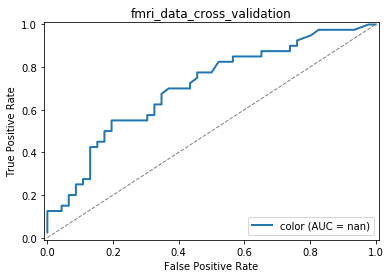

In [605]:
#def clf_randomforest(features,y,num_feat,atlas,name,path_to_save, key):
clf_randomforest(tangent_matrices,label,1,'msdl',"fmri_data_cross_validation",'../imgs_zach','color')